# ADS 505-Final Project

## Import required packages

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Load and Describe Dataset

In [5]:
df = pd.read_csv('ecommerce_data.csv', encoding='latin1')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Data Cleaning

In [10]:
df = df.dropna(subset=['Description'])


In [11]:
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)

In [12]:
print(df.isna().sum())
print("Final shape:", df.shape)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Final shape: (406829, 8)


In [13]:
print("Number of rows:", df.shape[0])
print("Number of unique customers:", df['CustomerID'].nunique())
print("Number of unique products:", df['StockCode'].nunique())
print("Time period:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
print("Total revenue:", round((df['Quantity'] * df['UnitPrice']).sum(), 2))

Number of rows: 406829
Number of unique customers: 4372
Number of unique products: 3684
Time period: 1/10/2011 10:32 to 9/9/2011 9:52
Total revenue: 8300065.81


## Exploratory Data Analysis

Top 10 Products by Quantity

In [14]:
top_products = (df.groupby('Description')['Quantity']
                  .sum()
                  .sort_values(ascending=False)
                  .head(10))
print(top_products)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64


Revenue by Country

In [15]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

country_revenue = (df.groupby('Country')['Revenue']
                     .sum()
                     .sort_values(ascending=False)
                     .head(10))
print(country_revenue)

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Revenue, dtype: float64


Top 10 Customers by Revenue

In [16]:
top_customers = (df.groupby('CustomerID')['Revenue']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))
print(top_customers)


CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: Revenue, dtype: float64


Average Basket Size (products per invoice)

In [17]:
basket_size = (df.groupby('InvoiceNo')['Quantity']
                 .sum()
                 .mean())
print("Average basket size:", round(basket_size, 2))


Average basket size: 221.13


C:\Users\91970\AppData\Local\Temp\ipykernel_22708\2424098549.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


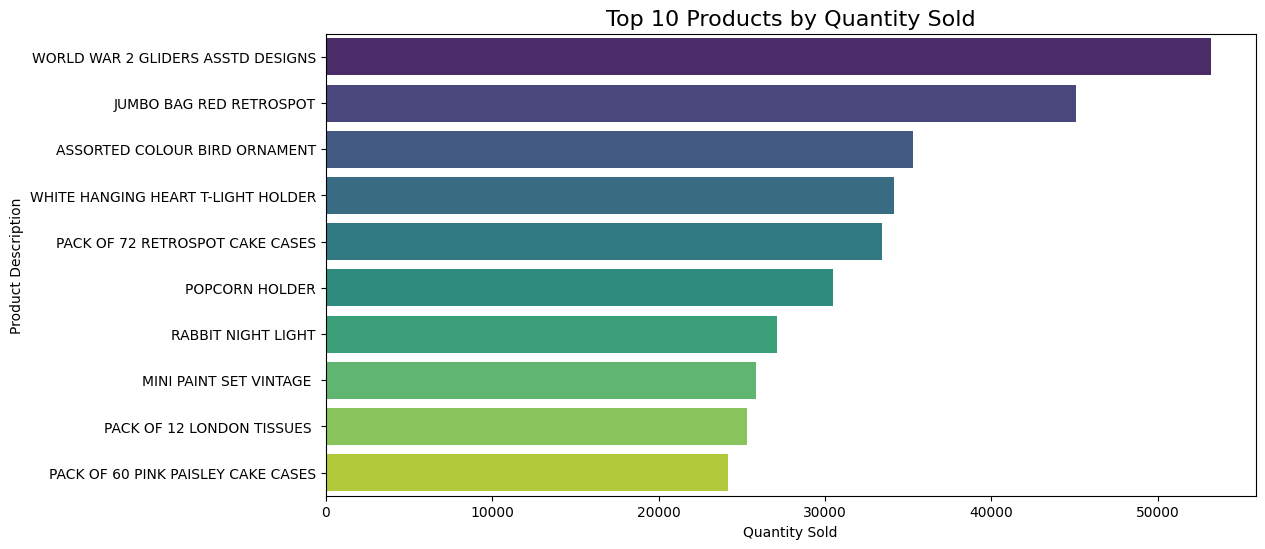

In [18]:
top_products = (df.groupby('Description')['Quantity']
                  .sum()
                  .sort_values(ascending=False)
                  .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Quantity Sold", fontsize=16)
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()


C:\Users\91970\AppData\Local\Temp\ipykernel_22708\3369711422.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="magma")


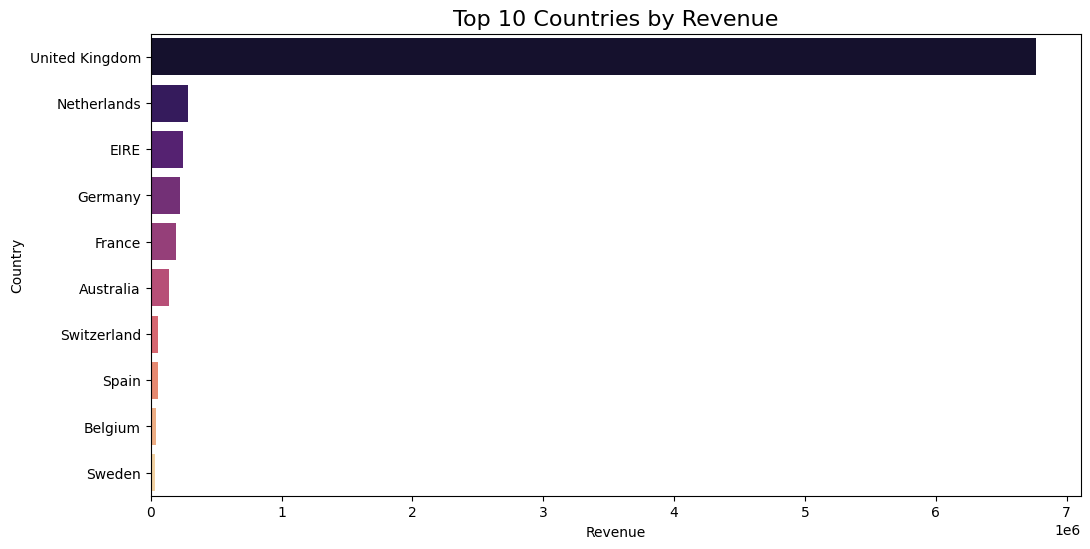

In [19]:
country_revenue = (df.groupby('Country')['Revenue']
                     .sum()
                     .sort_values(ascending=False)
                     .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="magma")
plt.title("Top 10 Countries by Revenue", fontsize=16)
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


C:\Users\91970\AppData\Local\Temp\ipykernel_22708\3374113013.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="cubehelix")


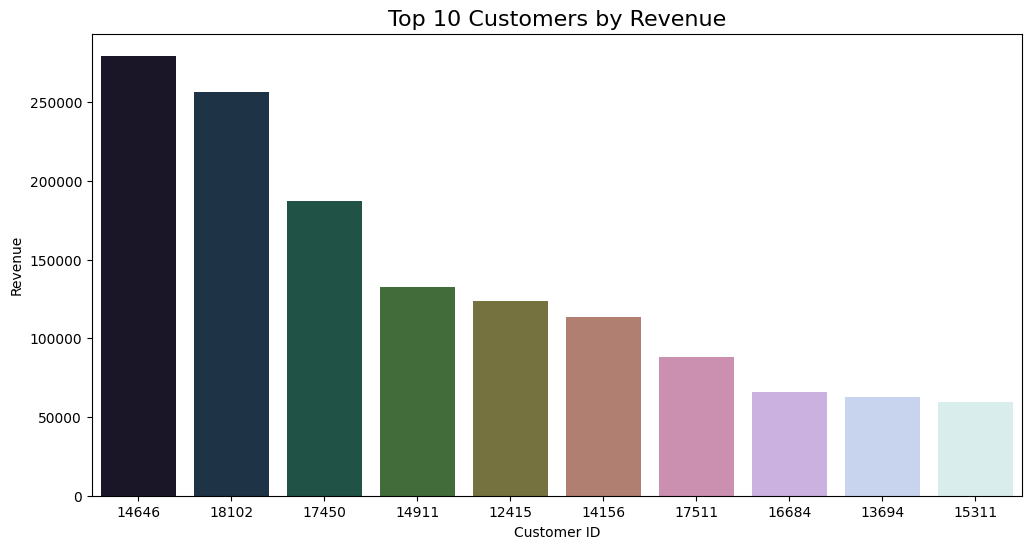

In [20]:
top_customers = (df.groupby('CustomerID')['Revenue']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="cubehelix")
plt.title("Top 10 Customers by Revenue", fontsize=16)
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.show()


In [21]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Now extract day of week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()


<Axes: title={'center': 'Revenue by Day of Week'}, xlabel='DayOfWeek'>

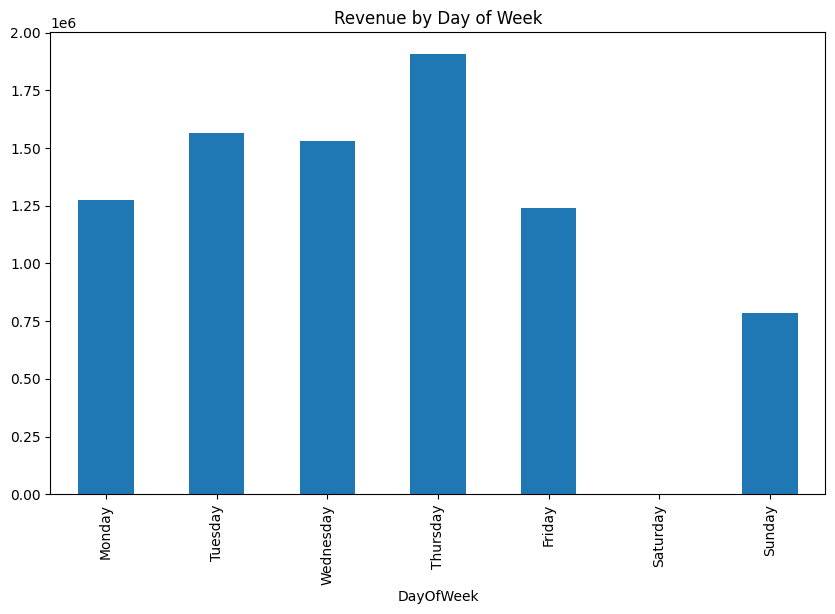

In [22]:
weekday_sales = (df.groupby('DayOfWeek')['Revenue']
                   .sum()
                   .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))

weekday_sales.plot(kind='bar', figsize=(10,6), title="Revenue by Day of Week")


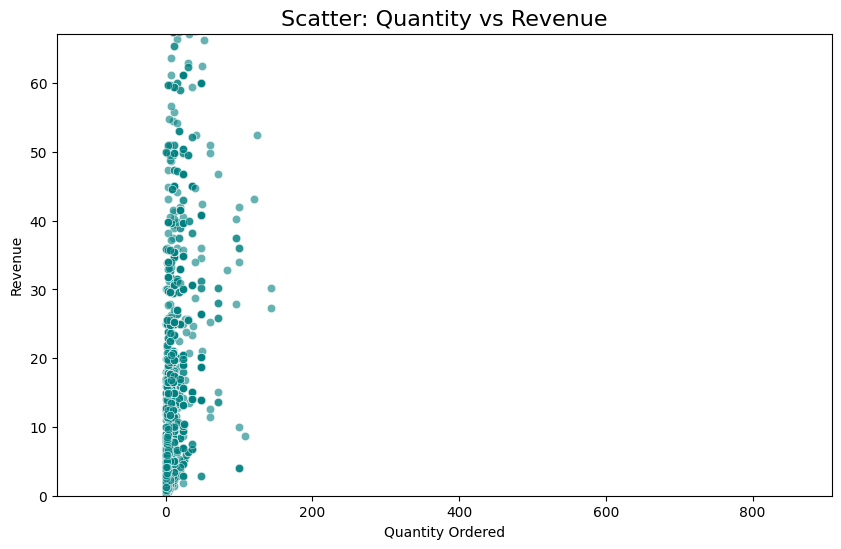

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(5000, random_state=42),  # sample for speed
                x="Quantity", y="Revenue", alpha=0.6, color="teal")
plt.title("Scatter: Quantity vs Revenue", fontsize=16)
plt.xlabel("Quantity Ordered")
plt.ylabel("Revenue")
plt.ylim(0, df['Revenue'].quantile(0.95))  # cap y-axis to avoid extreme outliers
plt.show()


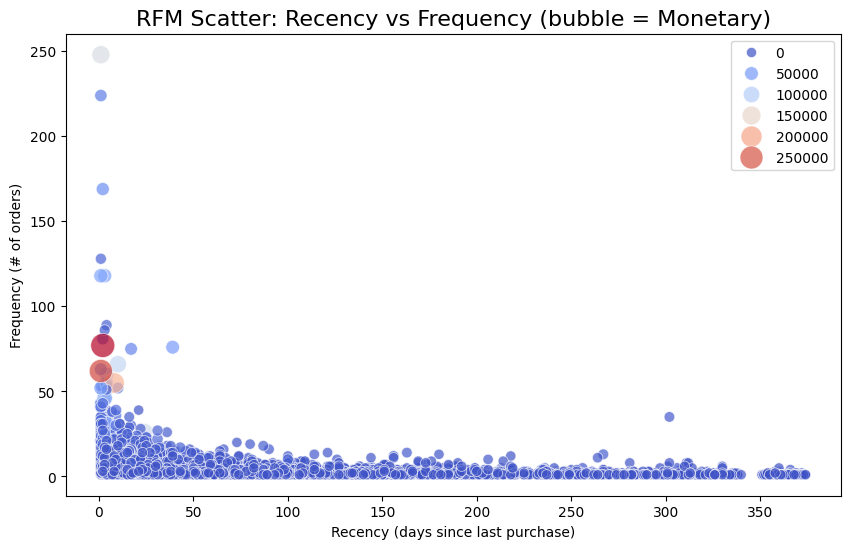

In [24]:
import datetime as dt

# Reference date
ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = (df.groupby('CustomerID')
         .agg(Recency=('InvoiceDate', lambda x: (ref_date - x.max()).days),
              Frequency=('InvoiceNo','nunique'),
              Monetary=('Revenue','sum'))
         .reset_index())

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x="Recency", y="Frequency",
                size="Monetary", hue="Monetary",
                palette="coolwarm", alpha=0.7, sizes=(50,300))
plt.title("RFM Scatter: Recency vs Frequency (bubble = Monetary)", fontsize=16)
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Frequency (# of orders)")
plt.legend(loc='upper right')
plt.show()


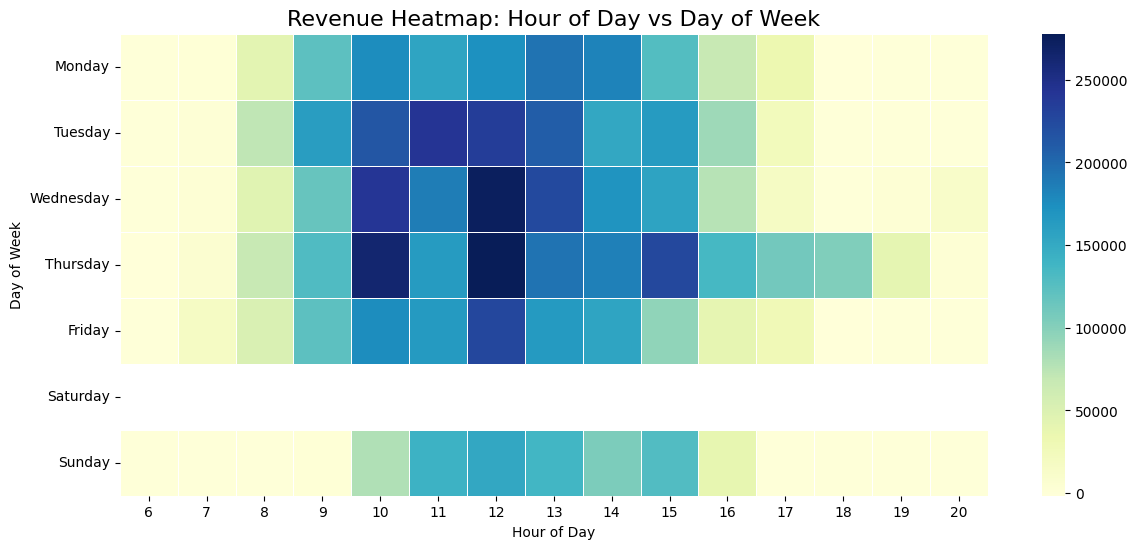

In [25]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day_name()

pivot = df.pivot_table(values="Revenue", index="Day", columns="Hour", aggfunc="sum").fillna(0)
pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("Revenue Heatmap: Hour of Day vs Day of Week", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


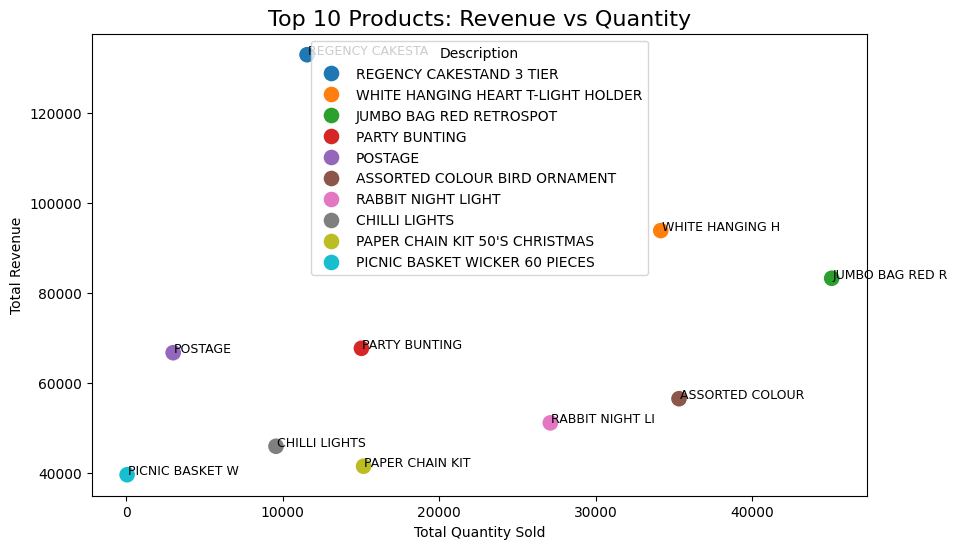

In [26]:
top10 = (df.groupby('Description')
           .agg(Quantity=('Quantity','sum'), Revenue=('Revenue','sum'))
           .sort_values(by="Revenue", ascending=False)
           .head(10)
           .reset_index())

plt.figure(figsize=(10,6))
sns.scatterplot(data=top10, x="Quantity", y="Revenue", hue="Description", s=150, palette="tab10")
for i in range(len(top10)):
    plt.text(top10.Quantity[i]+50, top10.Revenue[i], top10.Description[i][:15], fontsize=9)
plt.title("Top 10 Products: Revenue vs Quantity", fontsize=16)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Revenue")
plt.show()


### Feature Enginering - RFM Segmentation

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1) Build (or re-build) RFM cleanly
df['Revenue'] = df['Quantity'] * df['UnitPrice']
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = (df.groupby('CustomerID')
         .agg(Recency=('InvoiceDate', lambda x: (ref_date - x.max()).days),
              Frequency=('InvoiceNo','nunique'),
              Monetary=('Revenue','sum'))
         .reset_index())

# 2) Keep only numeric & valid values, remove non-finite
X = rfm[['Recency','Frequency','Monetary']].copy()

# Optional: reduce skew (helps KMeans)
X['Frequency'] = np.log1p(X['Frequency'])
X['Monetary']  = np.log1p(X['Monetary'])

# Replace inf with NaN, then drop
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# IMPORTANT: align rfm to the cleaned X indices
rfm_clean = rfm.loc[X.index].reset_index(drop=True)
X = X.reset_index(drop=True)

# 3) Remove any zero-variance columns (just in case)
nzv = X.columns[X.std() == 0]
if len(nzv) > 0:
    X = X.drop(columns=list(nzv))

# 4) Scale
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# 5) Guard: need >= 2 samples and >= k samples for chosen k
if Xs.shape[0] < 2:
    raise ValueError("Not enough customers after cleaning to run clustering.")
    
# 6) Choose best k via silhouette (skip k that are invalid)
scores = {}
best_k = None
best_s = -1
for k in range(2, min(7, Xs.shape[0])):  # k cannot exceed number of samples
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(Xs)
    # silhouette needs at least 2 labels
    if len(np.unique(labels)) > 1:
        s = silhouette_score(Xs, labels)
        scores[k] = float(s)
        if s > best_s:
            best_s = s
            best_k = k

print("Silhouette scores:", scores)
print("Best k =", best_k)

# 7) Final KMeans fit with best_k
if best_k is None:
    raise ValueError("Could not determine a valid k (check data volume/variance).")

final_km = KMeans(n_clusters=best_k, n_init=20, random_state=42)
rfm_clean['Cluster'] = final_km.fit_predict(Xs)

rfm_clean.head()


c:\Users\91970\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Silhouette scores: {2: 0.40309230397959517, 3: 0.41303430275565756, 4: 0.37513093216475807, 5: 0.3330968315656234, 6: 0.32517438526815834}
Best k = 3


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,326,2,0.00,2
1,12347,2,7,4310.00,1
2,12348,75,4,1797.24,1
3,12349,19,1,1757.55,0
4,12350,310,1,334.40,2


## Customer Segmentation - Clustering

In [28]:
cluster_profile = (rfm_clean.groupby('Cluster')
                   .agg(n_customers=('CustomerID','nunique'),
                        Recency_mean=('Recency','mean'),
                        Frequency_mean=('Frequency','mean'),
                        Monetary_mean=('Monetary','mean'))
                   .reset_index())

print(cluster_profile)


   Cluster  n_customers  Recency_mean  Frequency_mean  Monetary_mean
0        0         2000     53.561500        2.268000     588.103172
1        1         1370     29.705109       11.709489    4945.123715
2        2          961    253.425598        1.611863     376.970990


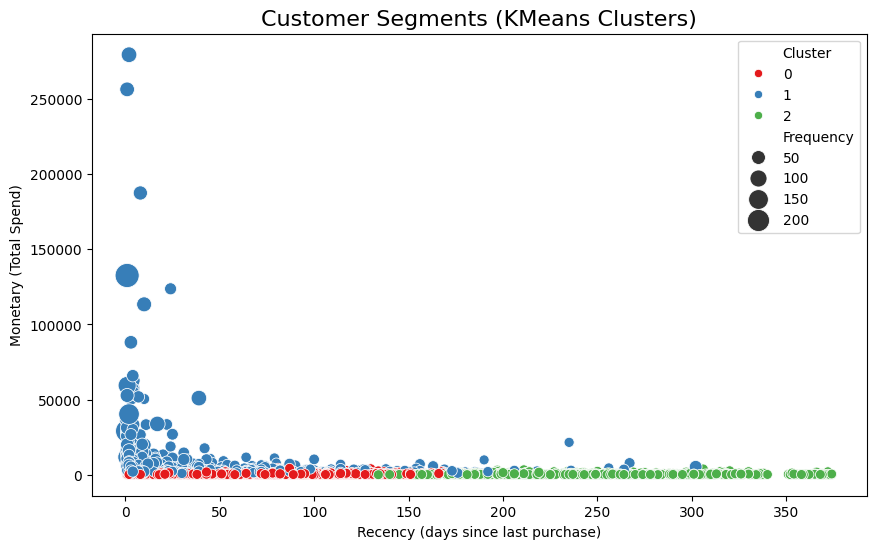

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm_clean, x="Recency", y="Monetary", 
                hue="Cluster", palette="Set1", size="Frequency", sizes=(50,300))
plt.title("Customer Segments (KMeans Clusters)", fontsize=16)
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Monetary (Total Spend)")
plt.show()


In [30]:
cluster_map = {
    0: "New Customers",
    1: "Champions",
    2: "At Risk"
}
rfm_clean['Segment'] = rfm_clean['Cluster'].map(cluster_map)


## Model Development - Classification

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Cutoff = last 90 days from final transaction
cutoff_date = df['InvoiceDate'].max() - pd.Timedelta(days=90)

hist = df[df['InvoiceDate'] <= cutoff_date]
future = df[df['InvoiceDate'] > cutoff_date]

future_customers = set(future['CustomerID'])

In [32]:
features = (hist.groupby('CustomerID')
              .agg(n_invoices=('InvoiceNo','nunique'),
                   n_lines=('InvoiceNo','count'),
                   qty_sum=('Quantity','sum'),
                   monetary_sum=('Revenue','sum'),
                   avg_price=('UnitPrice','mean'),
                   recency=('InvoiceDate', lambda x: (cutoff_date - x.max()).days))
              .reset_index())

# Target label: purchased again in next 90 days?
features['target'] = features['CustomerID'].apply(lambda x: 1 if x in future_customers else 0)

features.head()

,CustomerID,n_invoices,n_lines,qty_sum,monetary_sum,avg_price,recency,target
0,12346,2,2,0,0.00,1.040000,235,0
1,12347,5,124,1590,2790.86,2.797661,39,1
2,12348,3,28,2124,1487.24,4.864643,158,1
3,12350,1,17,197,334.40,3.841176,219,0
4,12352,8,48,188,601.18,39.584792,171,1


In [33]:
X = features.drop(['CustomerID','target'], axis=1)
y = features['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)

In [34]:
lr = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("Logistic Regression AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print(classification_report(y_test, pred_lr))

Logistic Regression AUC: 0.7442526798355019
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       364
           1       0.77      0.60      0.67       489

    accuracy                           0.67       853
   macro avg       0.68      0.68      0.67       853
weighted avg       0.69      0.67      0.67       853



In [35]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Random Forest AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print(classification_report(y_test, pred_rf))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

Random Forest AUC: 0.7327187127800625
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       364
           1       0.69      0.75      0.72       489

    accuracy                           0.66       853
   macro avg       0.65      0.65      0.65       853
weighted avg       0.66      0.66      0.66       853

monetary_sum    0.194060
n_lines         0.187224
recency         0.178937
qty_sum         0.177218
avg_price       0.164016
n_invoices      0.098544
dtype: float64


In [36]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 2, 4]
}
g_rf = GridSearchCV(rf, param_grid, cv=3, scoring="roc_auc", n_jobs=-1, verbose=1)
g_rf.fit(X_train, y_train)
print("Best RF:", g_rf.best_params_, "AUC:", g_rf.best_score_)
best_rf = g_rf.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best RF: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 600} AUC: 0.737803336811384


In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, solver="liblinear", class_weight="balanced", random_state=42)
param_grid = {"C": [0.1, 0.5, 1.0, 2.0, 5.0]}
g_lr = GridSearchCV(lr, param_grid, cv=3, scoring="roc_auc", n_jobs=-1, verbose=1)
g_lr.fit(X_train, y_train)
print("Best LR:", g_lr.best_params_, "AUC:", g_lr.best_score_)
best_lr = g_lr.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best LR: {'C': 0.1} AUC: 0.7501773768684772


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

proba = best_rf.predict_proba(X_test)[:,1]
prec, rec, th = precision_recall_curve(y_test, proba)

# Example: threshold giving best F1
f1s = [f1_score(y_test, (proba >= t).astype(int)) for t in th]
best_t = th[int(np.argmax(f1s))]
print("Best threshold (by F1):", best_t)

# Or: pick threshold with precision >= 0.8
target_precision = 0.80
idx = next(i for i,(p) in enumerate(prec[:-1]) if p >= target_precision)
t80 = th[idx]
print("Threshold for ≥80% precision:", t80)


Best threshold (by F1): 0.3661061793897035
Threshold for ≥80% precision: 0.6238006681511814


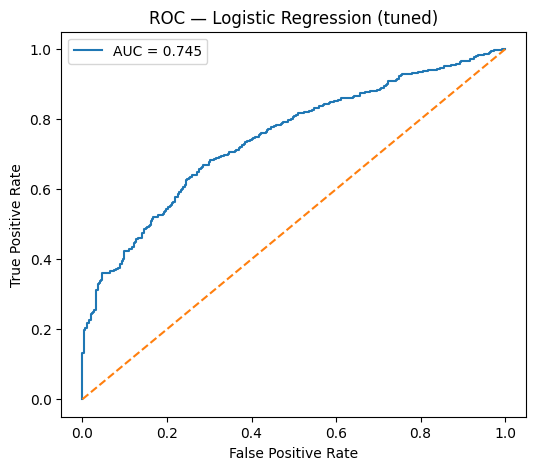

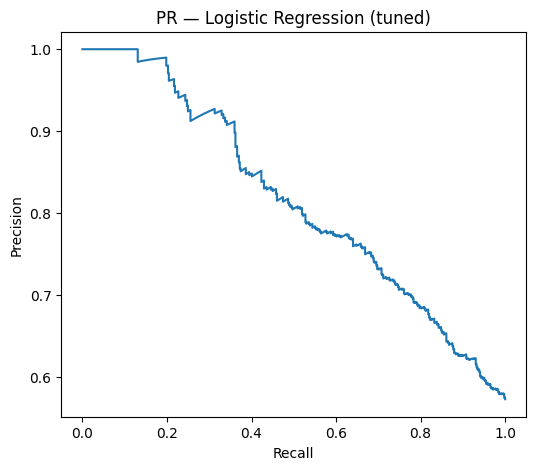

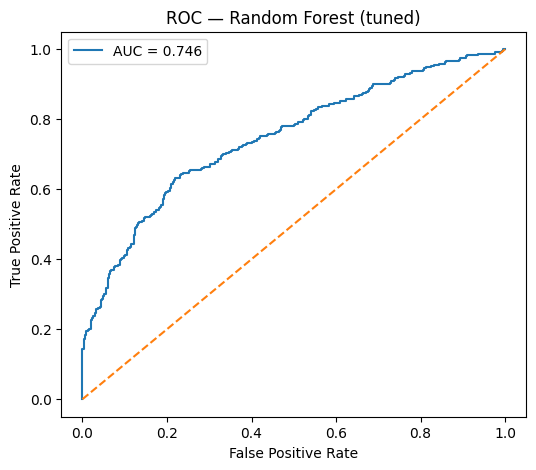

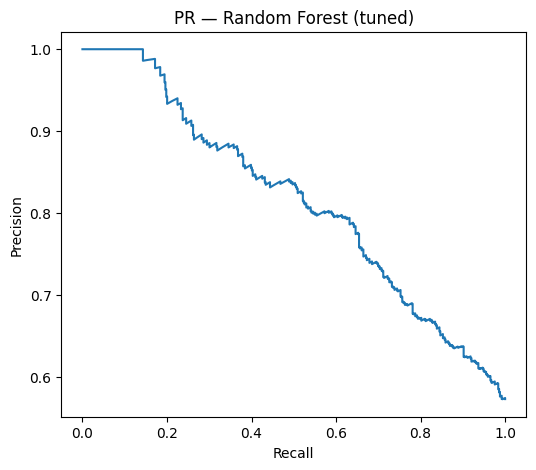

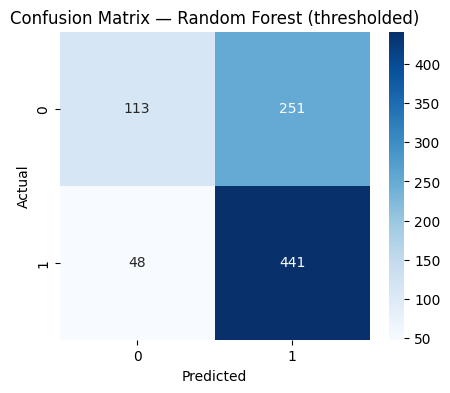

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import seaborn as sns
import numpy as np

def plot_roc(model, X_te, y_te, title):
    proba = model.predict_proba(X_te)[:,1]
    fpr, tpr, _ = roc_curve(y_te, proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.3f}")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(title); plt.legend(); plt.show()

def plot_pr(model, X_te, y_te, title):
    proba = model.predict_proba(X_te)[:,1]
    prec, rec, _ = precision_recall_curve(y_te, proba)
    plt.figure(figsize=(6,5))
    plt.plot(rec, prec)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(title); plt.show()

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

# Use tuned models
plot_roc(best_lr, X_test, y_test, "ROC — Logistic Regression (tuned)")
plot_pr(best_lr, X_test, y_test, "PR — Logistic Regression (tuned)")
plot_roc(best_rf, X_test, y_test, "ROC — Random Forest (tuned)")
plot_pr(best_rf, X_test, y_test, "PR — Random Forest (tuned)")

# Apply threshold from step 2 (e.g., best_t)
y_pred_thresh = (best_rf.predict_proba(X_test)[:,1] >= best_t).astype(int)
plot_cm(y_test, y_pred_thresh, "Confusion Matrix — Random Forest (thresholded)")
